## Exploration

train.csv shape is  (555719, 23)
test.csv shape is  (69465, 2)

       Id trans_date_trans_time        cc_num  \
0  205743      01/09/2020 08:22  5.596350e+15   
1  465349      12/12/2020 07:42  4.311370e+18   
2   17312      27/06/2020 13:03  2.264940e+15   
3  234968      14/09/2020 04:12  2.224100e+15   
4  194255      28/08/2020 17:40  3.527540e+15   

                              merchant       category      amt    first  \
0                      fraud_Berge LLC  gas_transport    72.18   Joseph   
1  fraud_Eichmann, Bogan and Rodriguez  gas_transport    36.66  Phillip   
2              fraud_Ankunding-Carroll         travel     1.74     Juan   
3     fraud_Schumm, Bauch and Ondricka    grocery_pos   140.99    Sheri   
4                    fraud_Gerlach Inc   shopping_net  1722.19   Teresa   

       last gender                        street  ...      lat      long  \
0     Moody      M              5901 Foster Pine  ...  29.9912  -90.2479   
1  Delacruz      M     26678 Lisa Lock

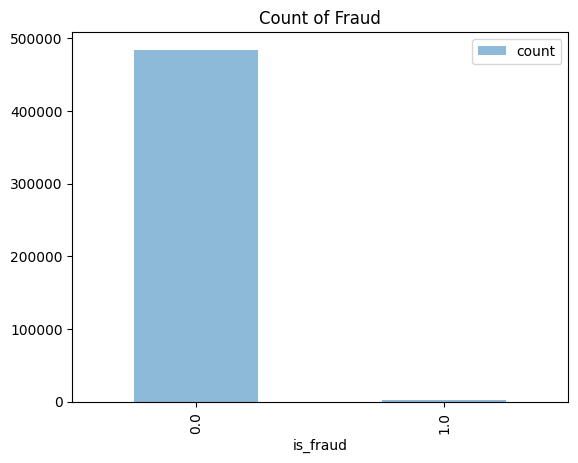

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['is_fraud'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Fraud")
plt.show()

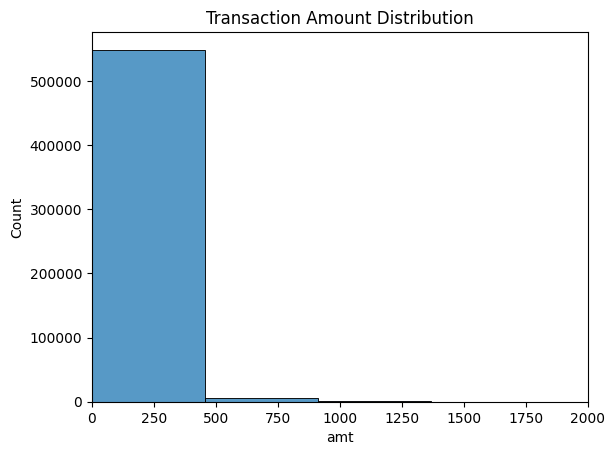

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(trainingSet['amt'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlim(0, 2000)  # Adjust based on your data
plt.show()


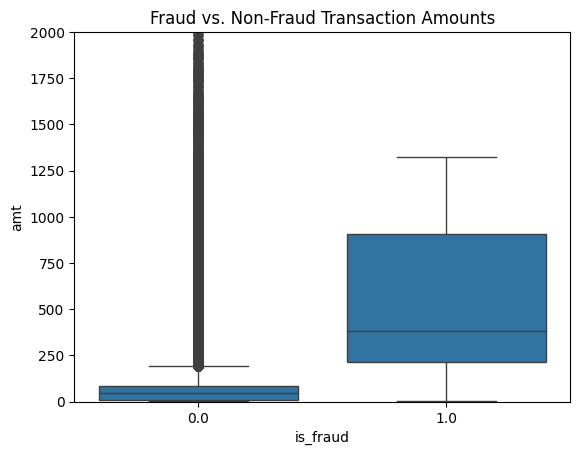

In [23]:
sns.boxplot(x='is_fraud', y='amt', data=trainingSet)
plt.title('Fraud vs. Non-Fraud Transaction Amounts')
plt.ylim(0, 2000)  # Adjust based on your data
plt.show()


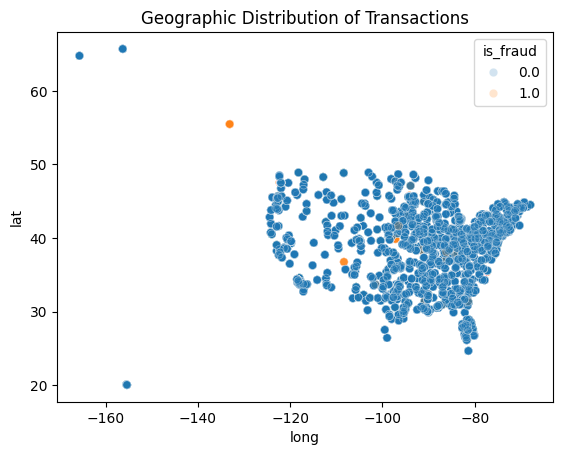

In [24]:
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=trainingSet, alpha=0.2)
plt.title('Geographic Distribution of Transactions')
plt.show()


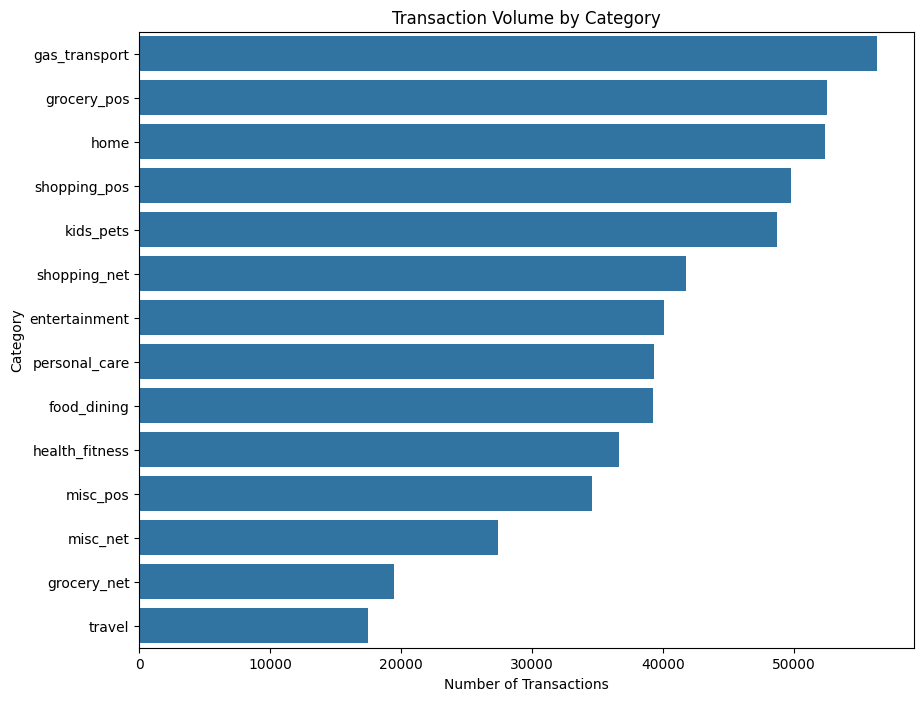

In [25]:
# Count of transactions by category
category_counts = trainingSet['category'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(y=category_counts.index, x=category_counts.values, orient='h')
plt.title('Transaction Volume by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()


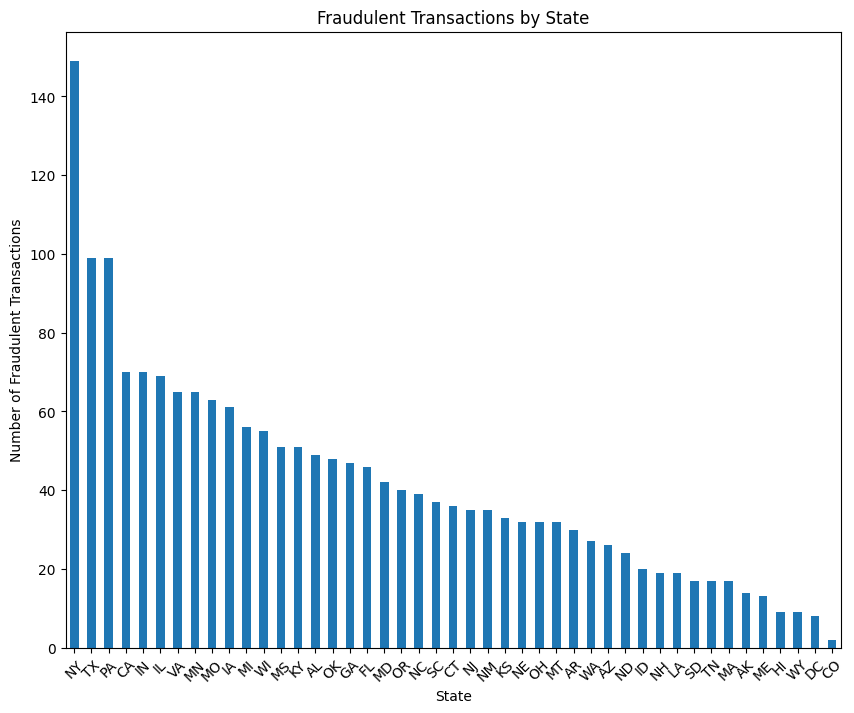

In [26]:
# Count of fraudulent transactions by state
fraud_by_state = trainingSet[trainingSet['is_fraud'] == 1]['state'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
fraud_by_state.plot(kind='bar')
plt.title('Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()


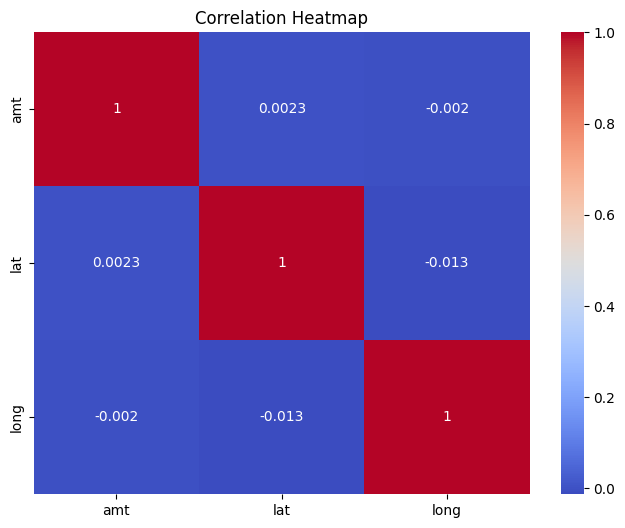

In [27]:
# Select numerical features
numerical_features = ['amt', 'lat', 'long']  # Add more features relevant to your dataset

# Compute correlation matrix
corr_matrix = trainingSet[numerical_features].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


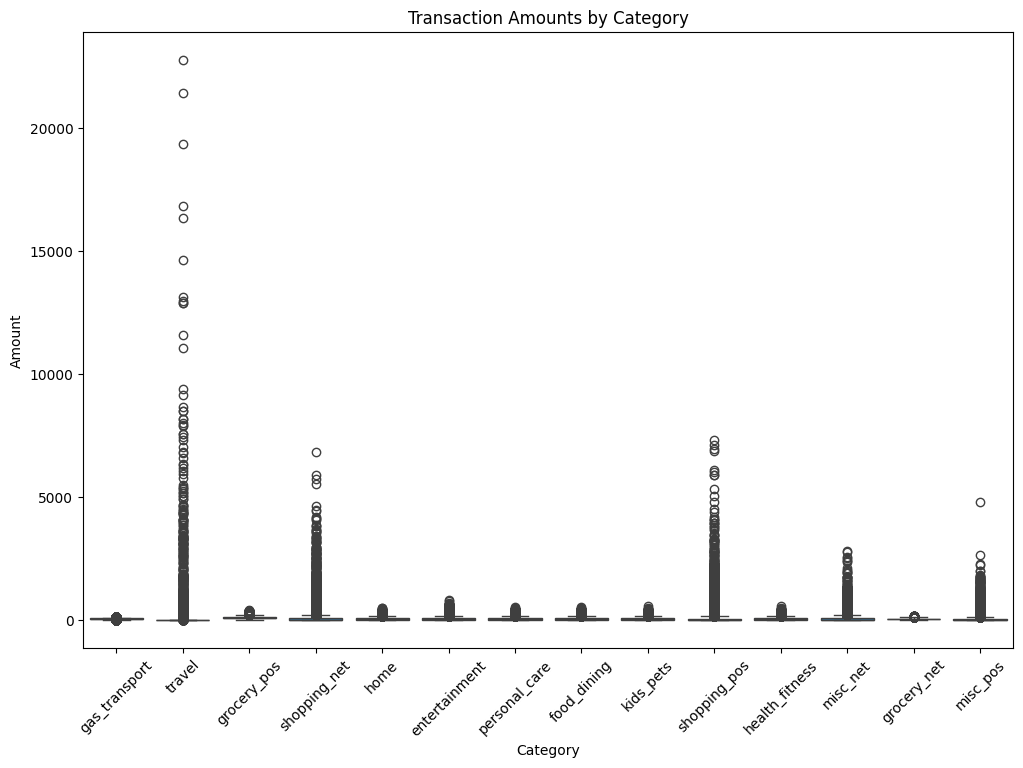

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='amt', data=trainingSet)
plt.xticks(rotation=45)
plt.title('Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()


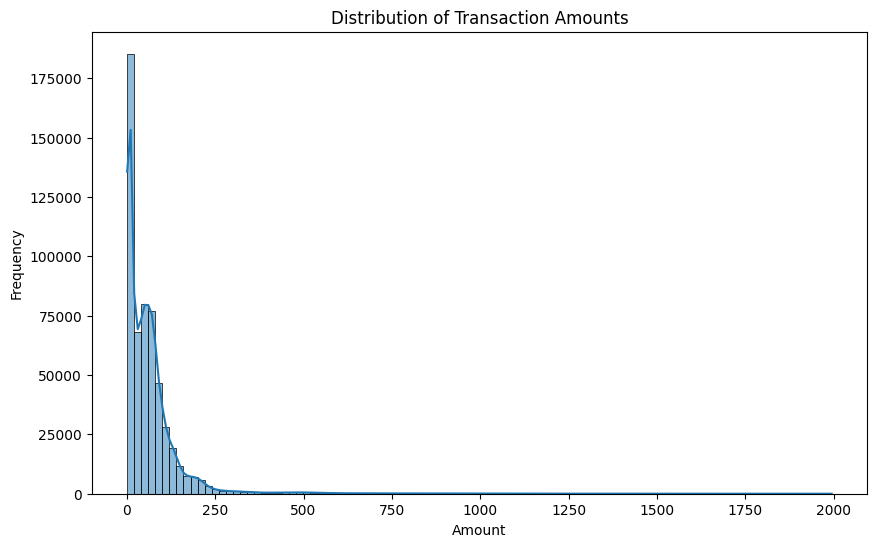

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(trainingSet[trainingSet['amt'] < 2000]['amt'], bins=100, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_26844\2525958664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts_by_category.index, y=fraud_counts_by_category.values, palette="rocket")


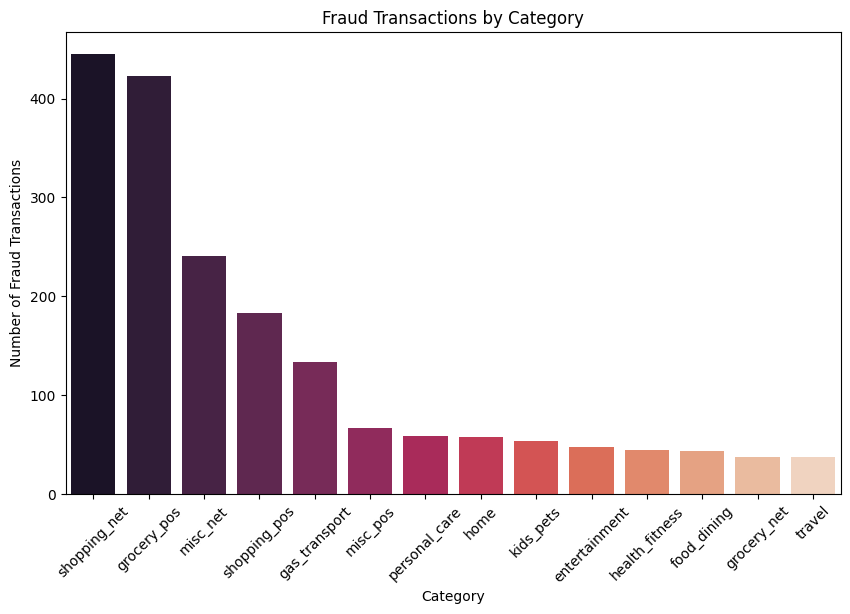

In [30]:
# Assuming 'is_fraud' column exists with 1 indicating fraud
fraud_transactions = trainingSet[trainingSet['is_fraud'] == 1]
fraud_counts_by_category = fraud_transactions['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts_by_category.index, y=fraud_counts_by_category.values, palette="rocket")
plt.title('Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()


Statistics of 'amt' for non-fraudulent transactions:
count    484377.000000
mean         67.495988
std         151.963785
min           1.000000
25%           9.590000
50%          47.120000
75%          82.540000
max       22768.110000
Name: amt, dtype: float64 

Statistics of 'amt' for fraudulent transactions:
count    1877.000000
mean      530.272611
std       392.915401
min         1.780000
25%       216.250000
50%       379.570000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64 



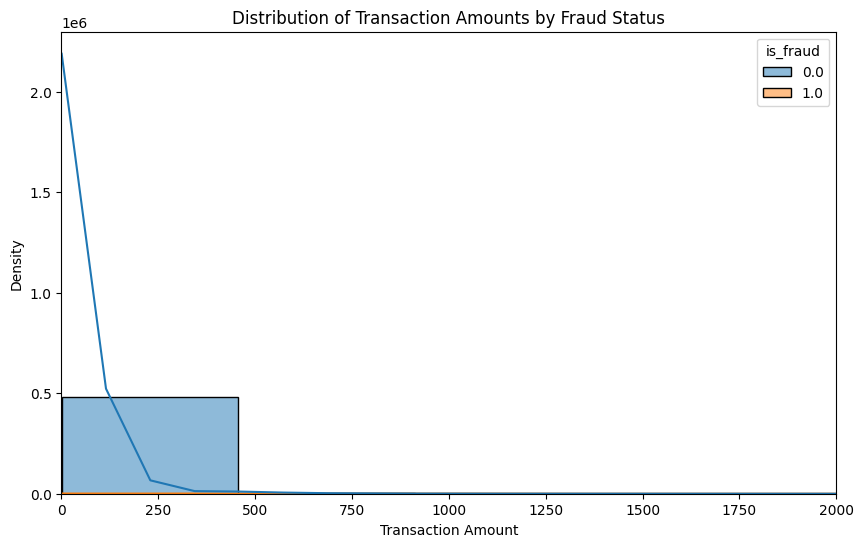

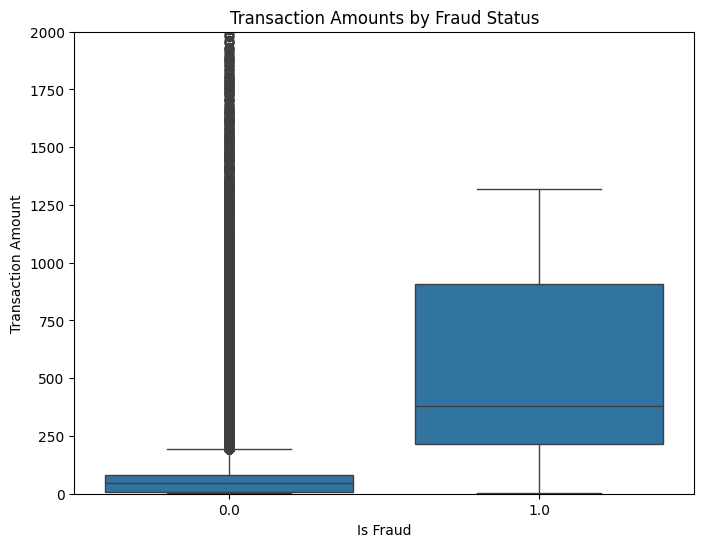

(0.0, 2000.0)

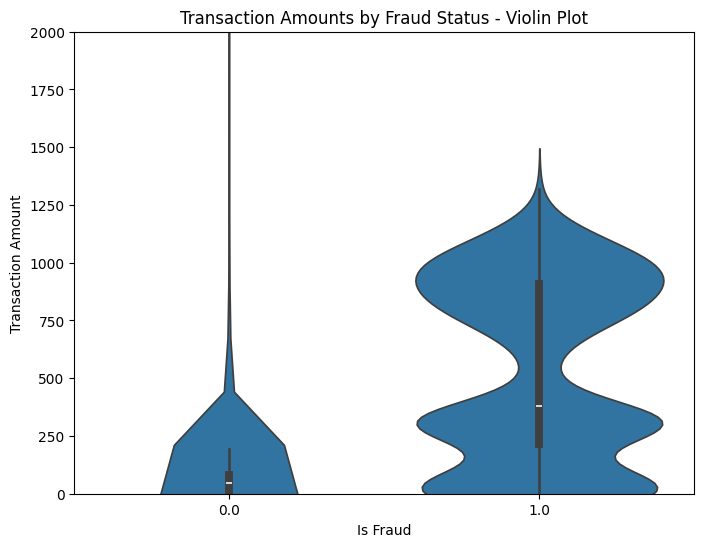

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("./data/train.csv")

# Basic statistics of 'amt' for fraudulent and non-fraudulent transactions
print("Statistics of 'amt' for non-fraudulent transactions:")
print(df[df['is_fraud'] == 0]['amt'].describe(), "\n")

print("Statistics of 'amt' for fraudulent transactions:")
print(df[df['is_fraud'] == 1]['amt'].describe(), "\n")

# Distribution of 'amt' for both fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, kde=True, common_norm=False)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.xlim(0, 2000)  # Limiting x-axis for better visibility
plt.show()

# Boxplot to compare the transaction amounts between fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.ylim(0, 2000)  # Limiting y-axis for better visibility
plt.show()

# Violin plot for another view of the distribution of transaction amounts by fraud status
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status - Violin Plot')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.ylim(0, 2000)  # Limiting


In [32]:
# This is one of the ways I used to calculate the distance between the two points.

import pandas as pd
import numpy as np

# Haversine formula to calculate distance between two points on the Earth
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Example center point and radius
center_lat = 40.7128 # Example: New York City latitude
center_long = -96 # Example: New York City longitude
radius_in_km = 50 # Define the radius of the circle in kilometers

# Load your dataset
# df = pd.read_csv("/mnt/data/train.csv")


# Now df has an additional column 'in_defined_region' where 1 indicates the transaction
# is within the radius of the defined circle, and 0 indicates it is outside.


## Feature Extraction

In [33]:
# This code block is what I used to process the dataset.
import pandas as pd
from haversine import haversine, Unit

def process(df):
    # Convert transaction timestamp to datetime
    date_time = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

    # Extract features from transaction timestamp
    df['trans_date'] = date_time.dt.date
    df['trans_time'] = date_time.dt.time
    df['trans_hour'] = date_time.dt.hour
    df['trans_dayofweek'] = date_time.dt.dayofweek
    df['trans_month'] = date_time.dt.month

    # Create transaction amount bins
    bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, float('inf')]
    labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-5000', '5000+']
    df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=labels)

    # Calculate distance from merchant using latitude and longitude
    df['distance_from_merchant'] = ((df['lat'] - df['merch_lat']) ** 2 + (df['long'] - df['merch_long']) ** 2) ** 0.5

    # Calculate age of cardholder
    df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')
    df['age'] = (date_time - df['dob']).dt.days // 365

    # Count frequency of transactions for each cardholder
    df['transaction_frequency'] = df.groupby('cc_num')['trans_num'].transform('count')

    # Transaction Frequency by Merchant and Category
    df['merchant_category_freq'] = df.groupby(['merchant', 'category'])['trans_num'].transform('count')

    # Transaction Amount Deviation from Merchant Average
    df['amt_deviation_merchant'] = df['amt'] - df.groupby('merchant')['amt'].transform('mean')

    # Transaction Amount Deviation from Category Average
    df['amt_deviation_category'] = df['amt'] - df.groupby('category')['amt'].transform('mean')

    # Transaction Time Deviation from Merchant Average
    df['time_deviation_merchant'] = df['trans_hour'] - df.groupby('merchant')['trans_hour'].transform('mean')

    # Transaction Time Deviation from Category Average
    df['time_deviation_category'] = df['trans_hour'] - df.groupby('category')['trans_hour'].transform('mean')

    # Transaction Amount Deviation from Cardholder Average
    df['amt_deviation_cardholder'] = df['amt'] - df.groupby('cc_num')['amt'].transform('mean')

    # Feature 1: Latitude between 30 and 50, and Longitude between -120 and -80
    df['in_lat_long_range'] = ((df['lat'] >= 30) & (df['lat'] <= 50) & (df['long'] >= -120) & (df['long'] <= -80)).astype(int)

    # Feature 2: Transactions in states NY, TX, and PA
    df['in_selected_states'] = df['state'].isin(['NY', 'TX', 'PA']).astype(int)

    # Feature 3: Transactions with 'amt' less than or equal to 250
    df['amt_le_250'] = (df['amt'] <= 250).astype(int)

    # Feature 4: Transactions in selected categories
    selected_categories = ['shopping_net', 'grocery_pos', 'misc_net', 'shopping_pos', 'gas_transport']
    df['in_selected_categories'] = df['category'].isin(selected_categories).astype(int)

    center_lat = 40.7128 
    center_long = -96 
    radius_in_km = 50 

    # Calculate the distance from center for each transaction
    df['distance_from_center'] = df.apply(
        lambda row: haversine(
            (center_lat, center_long), 
            (row['lat'], row['long']), 
            unit='km'
        ), 
        axis=1
    )

    # Determine if each transaction is within the defined region
    df['in_defined_region'] = (df['distance_from_center'] <= radius_in_km).astype(int)

    # df['merchant_variety'] = df.groupby('cc_num')['merchant'].transform('nunique')

    # State-specific transaction amounts
    df['state_specific_amt_avg'] = df.groupby(['state'])['amt'].transform('mean')
    df['amt_state_ratio'] = df['amt'] / df['state_specific_amt_avg']

    # Category-specific transaction counts
    df['category_trans_count'] = df.groupby(['category'])['amt'].transform('count')

    # Card usage frequency (Number of transactions per card)
    df['card_usage_frequency'] = df.groupby('cc_num')['amt'].transform('count')

    # Average transaction amount per card
    df['avg_trans_amt_per_card'] = df.groupby('cc_num')['amt'].transform('mean')

    # Average distance from merchant per card
    df['avg_distance_from_merchant'] = df.groupby('cc_num')['distance_from_merchant'].transform('mean')

    # Indicator for high risk categories (based on external knowledge or data analysis)
    high_risk_categories = ['shopping_net', 'grocery_pos', 'misc_net', 'shopping_pos', 'gas_transport']
    df['is_high_risk_category'] = df['category'].isin(high_risk_categories).astype(int)

    # Customer's city population category
    bins = [0, 10000, 100000, 500000, np.inf]
    labels = ['small_town', 'medium_town', 'large_town', 'metropolitan']
    df['city_population_category'] = pd.cut(df['city_pop'], bins=bins, labels=labels)


    # Ratio of transaction amount to cardholder's average city population
    df['amt_to_avg_city_pop'] = df['amt'] / df.groupby('cc_num')['city_pop'].transform('mean')


    # Transaction Amount as a Percentage of Customer's Average Transaction Amount
    df['trans_amt_pct_avg'] = df['amt'] / df.groupby('cc_num')['amt'].transform('mean')

    
    # # Ratio of Online to Offline Transactions (assuming 'category' contains this info)
    # df['online_trans_ratio'] = df[df['category'].str.contains('online')].groupby('cc_num')['amt'].transform('count') / \
    #                            df.groupby('cc_num')['amt'].transform('count')
    
    # Average Transaction Amount in Customer's State versus Nationwide
    # df['avg_amt_state_vs_nation'] = df.groupby('state')['amt'].transform('mean') / df['amt'].mean()
    
    


    # Drop unnecessary columns
    df.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)

    return df



# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# train_processed = train_processed[
#     (train_processed['in_lat_long_range'] == 1) #&
#     (train_processed['in_selected_states'] == 1) &
#     (train_processed['amt_le_250'] == 1) &
#     (train_processed['in_selected_categories'] == 1)
# ]

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['is_fraud_x'])
testX = testX.rename(columns={'is_fraud_y': 'is_fraud'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['is_fraud'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)

## Creating your model

In [34]:
# This is the code block I used to train the model and save it for later use.
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['is_fraud'], axis=1),
        X_train['is_fraud'],
        test_size=1/4.0,
        random_state=0
    )

# This is where you can do more feature selection
X_train_processed = X_train._get_numeric_data()
print(X_train_processed.columns)
X_test_processed = X_test._get_numeric_data()

# selected_features = [
#     'amt', 'age', 'transaction_frequency',
#     'in_lat_long_range', 'in_selected_states', 'amt_le_250',
#     'in_selected_categories'
# ]

selected_features = [
        'Id',
       'amt', 
#        'zip', 
#        'lat', 
#        'long', 
#        'city_pop', 
#        'unix_time',
#        'merch_lat', 
#        'merch_long', 
       'trans_hour', 
       'trans_dayofweek',
       'trans_month', 
#        'distance_from_merchant', 
       'age', 'transaction_frequency',
       'merchant_category_freq', 'amt_deviation_merchant',
       'amt_deviation_category', 'time_deviation_merchant',
       'time_deviation_category', 'amt_deviation_cardholder',
       'in_lat_long_range', 'in_selected_states', 'amt_le_250',
       'in_selected_categories', 'distance_from_center', 'in_defined_region',
       # 'merchant_variety', 
       'state_specific_amt_avg', 'amt_state_ratio',
       'category_trans_count', 'card_usage_frequency',
       'avg_trans_amt_per_card', 'avg_distance_from_merchant',
       'is_high_risk_category', 'amt_to_avg_city_pop', 'trans_amt_pct_avg'
       # 'online_trans_ratio', 'avg_amt_state_vs_nation'
]


# Select only the desired features for training and testing sets
X_train_selected = X_train_processed[selected_features]
# X_train_selected = X_train_selected[(train_processed['in_lat_long_range'] == 1)]
X_test_selected = X_test_processed[selected_features]
print(X_train_selected.columns)




model = RandomForestClassifier().fit(X_train_selected, Y_train)

# pickle model - saves it so you can load it later
with open('decision_tree_20_model.obj', 'wb') as f:
        pickle.dump(model, f)


# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test_selected)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("F1 score on testing set = ", f1_score(Y_test, Y_test_predictions))

Index(['Id', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'trans_hour', 'trans_dayofweek',
       'trans_month', 'distance_from_merchant', 'age', 'transaction_frequency',
       'merchant_category_freq', 'amt_deviation_merchant',
       'amt_deviation_category', 'time_deviation_merchant',
       'time_deviation_category', 'amt_deviation_cardholder',
       'in_lat_long_range', 'in_selected_states', 'amt_le_250',
       'in_selected_categories', 'distance_from_center', 'in_defined_region',
       'state_specific_amt_avg', 'amt_state_ratio', 'category_trans_count',
       'card_usage_frequency', 'avg_trans_amt_per_card',
       'avg_distance_from_merchant', 'is_high_risk_category',
       'amt_to_avg_city_pop', 'trans_amt_pct_avg'],
      dtype='object')
Index(['Id', 'amt', 'trans_hour', 'trans_dayofweek', 'trans_month', 'age',
       'transaction_frequency', 'merchant_category_freq',
       'amt_deviation_merchant', 'amt_deviation_cat

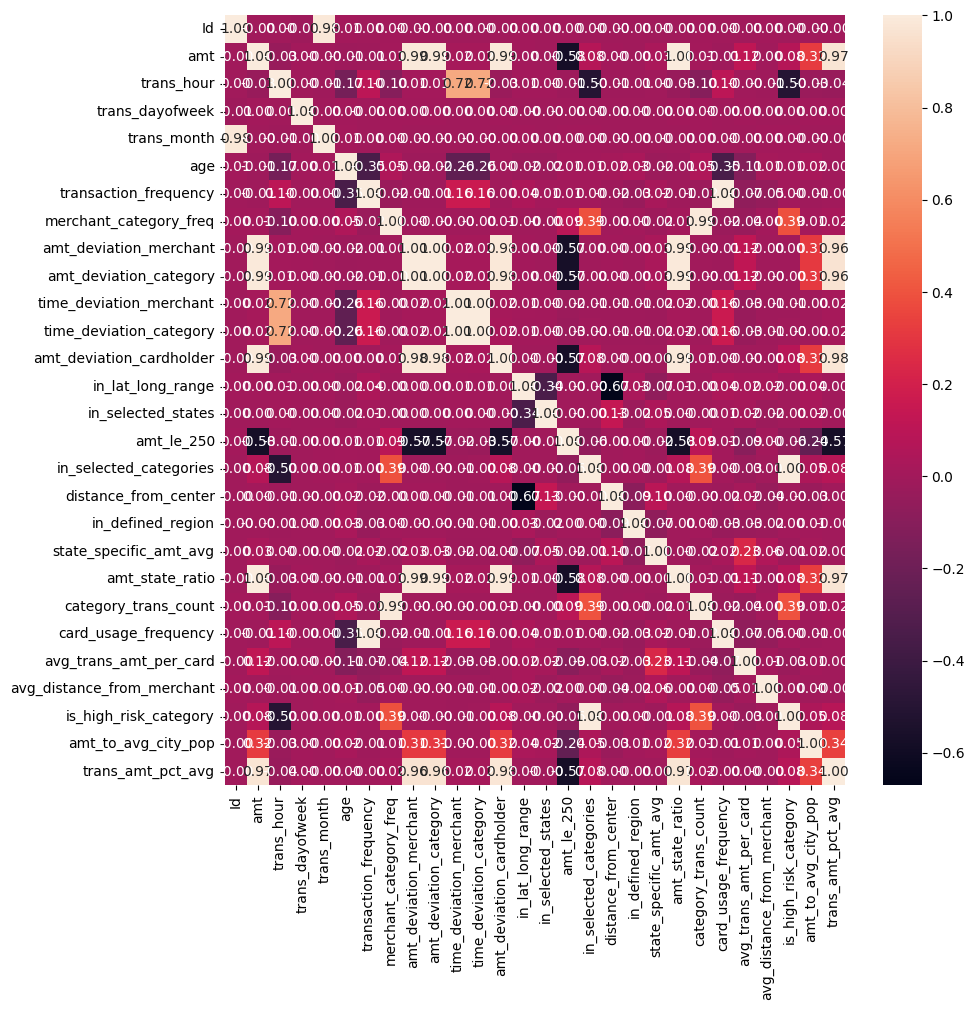

In [35]:
import seaborn as sns

# Calculate correlation matrix
corr = X_train_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


## Create the Kaggle submission

In [36]:
X_submission = pd.read_csv("./data/X_test.csv")

selected_features = [
        'Id',
       'amt', 
#        'zip', 
#        'lat', 
#        'long', 
#        'city_pop', 
#        'unix_time',
#        'merch_lat', 
#        'merch_long', 
       'trans_hour', 
       'trans_dayofweek',
       'trans_month', 
#        'distance_from_merchant', 
       'age', 'transaction_frequency',
       'merchant_category_freq', 'amt_deviation_merchant',
       'amt_deviation_category', 'time_deviation_merchant',
       'time_deviation_category', 'amt_deviation_cardholder',
       'in_lat_long_range', 'in_selected_states', 'amt_le_250',
       'in_selected_categories', 'distance_from_center', 'in_defined_region',
       # 'merchant_variety', 
       'state_specific_amt_avg', 'amt_state_ratio',
       'category_trans_count', 'card_usage_frequency',
       'avg_trans_amt_per_card', 'avg_distance_from_merchant',
       'is_high_risk_category', 'amt_to_avg_city_pop', 'trans_amt_pct_avg'
       # 'online_trans_ratio', 'avg_amt_state_vs_nation'
]

X_submission_processed = X_submission._get_numeric_data().drop(columns=['is_fraud'])
X_submission_processed = X_submission[selected_features]




print(X_submission_processed.columns)

X_submission['is_fraud'] = model.predict(X_submission_processed)
X_submission.is_fraud = X_submission.is_fraud.astype(int)
submission = X_submission[['Id', 'is_fraud']]
submission.to_csv("./data/submission.csv", index=False)

Index(['Id', 'amt', 'trans_hour', 'trans_dayofweek', 'trans_month', 'age',
       'transaction_frequency', 'merchant_category_freq',
       'amt_deviation_merchant', 'amt_deviation_category',
       'time_deviation_merchant', 'time_deviation_category',
       'amt_deviation_cardholder', 'in_lat_long_range', 'in_selected_states',
       'amt_le_250', 'in_selected_categories', 'distance_from_center',
       'in_defined_region', 'state_specific_amt_avg', 'amt_state_ratio',
       'category_trans_count', 'card_usage_frequency',
       'avg_trans_amt_per_card', 'avg_distance_from_merchant',
       'is_high_risk_category', 'amt_to_avg_city_pop', 'trans_amt_pct_avg'],
      dtype='object')


In [37]:
print(len(submission))

69465


Now you can upload the `submission.csv` to kaggle